<h> For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth. <h>

In [1]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#reading the csv file
df = pd.read_csv('fcc-forum-pageviews.csv')

In [3]:
#changing the date to a datetime
df['date']=pd.to_datetime(df['date'])

<h>Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.<h>

In [4]:
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [5]:
#filtering for the dataframe: 
filt_df = df.loc[:, df.columns != 'date']
filt_df.head(5)

,value
0,1201
1,2329
2,1716
3,10539
4,6933


In [6]:
#getting the low and high at the values of 2.5 and 97.5 percent.
low = .025
high = .975
quant_df = df.quantile([low,high])
print(quant_df)


            value
0.025   17876.400
0.975  177613.075


In [7]:
filt_df = filt_df.apply(lambda x: x[(x>quant_df.loc[low,x.name]) & 
                                    (x < quant_df.loc[high,x.name])], axis=0)

In [8]:
filt_df.head()

,value
10,19736
17,18060
18,19997
19,19044
20,20325


In [9]:
filt_df = filt_df.dropna()
filt_df.head()

,value
10,19736
17,18060
18,19997
19,19044
20,20325


In [10]:
filt_df = pd.concat([df.loc[:,'date'], filt_df], axis=1)

In [11]:
filt_df.head()

,date,value
0,2016-05-09,NaN
1,2016-05-10,NaN
2,2016-05-11,NaN
3,2016-05-12,NaN
4,2016-05-13,NaN


In [12]:
print(filt_df.describe())

               value
count    1238.000000
mean    63060.147819
std     31674.626598
min     18060.000000
25%     37244.250000
50%     57197.500000
75%     81646.500000
max    177588.000000


<h>Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".<h>

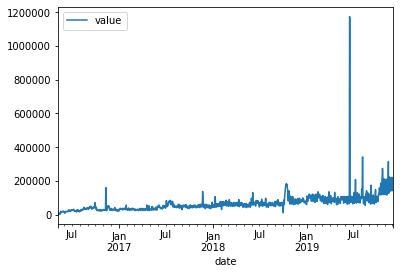

In [13]:
df.plot(x='date',y='value')

<h1>Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".<h1>

In [14]:
filt_df.resample('D',on = 'date').mean()


,value
date,
2016-05-09,NaN
2016-05-10,NaN
2016-05-11,NaN
2016-05-12,NaN
2016-05-13,NaN
...,...
2019-11-29,171584.0
2019-11-30,141161.0
2019-12-01,142918.0


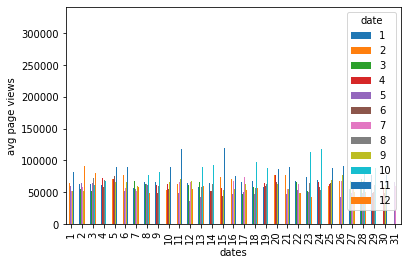

In [15]:

df2 = df.groupby([df.date.dt.day, df.date.dt.month]).mean().unstack()
df2.columns = df2.columns.droplevel()
df2.plot.bar()
plt.xlabel('dates')
plt.ylabel('avg page views')
plt.show()

<h1>Create a draw_box_plot function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.<h1>

In [16]:
df.head()


,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [17]:
df.tail()


,date,value
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144
1303,2019-12-03,158549


Error in callback <function flush_figures at 0x0000014739C78AF8> (for post_execute):


KeyboardInterrupt: 

In [ ]:
df_box = pd.DataFrame(df)
df_box['Year'] = df['date'].dt.year
df_box['Month'] = df['date'].dt.month
df_box.loc[df_box['Month'] == 1, 'Month'] = "Jan"
df_box.loc[df_box['Month'] == 2, 'Month'] = "Feb"
df_box.loc[df_box['Month'] == 3, 'Month'] = "Mar"
df_box.loc[df_box['Month'] == 4, 'Month'] = "Apr"
df_box.loc[df_box['Month'] == 5, 'Month'] = "May"
df_box.loc[df_box['Month'] == 6, 'Month'] = "Jun"
df_box.loc[df_box['Month'] == 7, 'Month'] = "Jul"
df_box.loc[df_box['Month'] == 8, 'Month'] = "Aug"
df_box.loc[df_box['Month'] == 9, 'Month'] = "Sep"
df_box.loc[df_box['Month'] == 10, 'Month'] = "Oct"
df_box.loc[df_box['Month'] == 11, 'Month'] = "Nov"
df_box.loc[df_box['Month'] == 12, 'Month'] = "Dec"


fig, axes = plt.subplots(figsize=(20, 5), ncols=2, sharex=False)
sns.despine(left=True)

box_plot_year = sns.boxplot(x=df_box['Year'], y=df_box.value, ax=axes[0])
box_plot_year.set_title("Year-wise Box Plot (Trend)")
box_plot_year.set_xlabel('Year') 
box_plot_year.set_ylabel('Page Views')

box_plot_month = sns.boxplot(x=df_box['Month'], y=df_box.value, ax=axes[1])
box_plot_month.set_title("Month-wise Box Plot (Seasonality)")
box_plot_month.set_xlabel('Month')
box_plot_month.set_ylabel('Page Views')   
    
fig.savefig('box_plot.png')
return fig

In [ ]:
|